In [52]:
# from animaldataset.dataset import get_data_loaders
import torch
from torchvision import models
from PIL import Image
from matplotlib.pyplot import imshow
from torchvision import models, transforms

In [53]:
import matplotlib.pyplot as plt

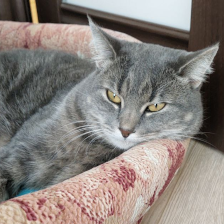

In [103]:
image = Image.open("cat.png")
image = image.convert()
(image)

In [104]:
input = transforms.PILToTensor()(image)
input = input.to(dtype=torch.float)

In [116]:
from torchcam.methods import LayerCAM
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import normalize, resize, to_pil_image

In [117]:
model = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
model.fc = torch.nn.Linear(in_features=model.fc.in_features, out_features=151)

In [118]:
model.zero_grad()

In [119]:
cam = LayerCAM(model, model.layer4[2].conv2)

In [120]:
# with torch.no_grad(): 
out = model(input.unsqueeze(0))

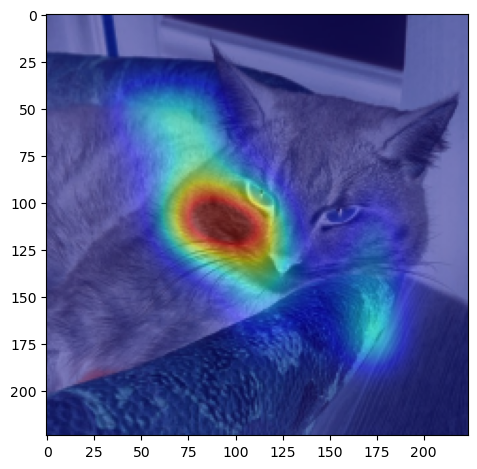

In [121]:
activation_map = cam(out.squeeze(0).argmax().item(), out)
result = overlay_mask(to_pil_image(input), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.tight_layout(); plt.show()